In [1]:
import json
import requests
import pandas as pd
from pprint import pprint
from pandas.io.json import json_normalize

In [2]:
api_key='Vt-PaVFa5nzWAL0BEWsdKwhF1bOdFaWh_Bdb-SCFa0xjWQ6Yo8pF29crLXs3TzbFp3p_5WLEX4LlHxGjI9Mxu7yKlcSxXMndQDKeld5hctdkJ57tFVgg7Bwn5baXXXYx'
headers = {'Authorization': 'Bearer %s' % api_key}

In [3]:

url='https://api.yelp.com/v3/businesses/search'
#params={'term':'bookstore', 'location':'New York City','limit':''}
 

In [4]:
# Assign Params
params = {'term':'italian','location':'Houston','limit':'50'}

In [5]:
# Making a get request to the API
req=requests.get(url, params=params, headers=headers)


In [6]:
req.json()

{'businesses': [{'id': 'd6cm5ns_Hfy83-e3nm3CSg',
   'alias': 'rivas-italian-restaurant-houston',
   'name': "Riva's Italian Restaurant",
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/i-0pXB2oDMCetLeDiqNySg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/rivas-italian-restaurant-houston?adjust_creative=oOYEY2fFk9QNeRkdw6v4dw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oOYEY2fFk9QNeRkdw6v4dw',
   'review_count': 508,
   'categories': [{'alias': 'italian', 'title': 'Italian'}],
   'rating': 4.0,
   'coordinates': {'latitude': 29.74605, 'longitude': -95.39248},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '1117 Missouri St',
    'address2': '',
    'address3': '',
    'city': 'Houston',
    'zip_code': '77006',
    'country': 'US',
    'state': 'TX',
    'display_address': ['1117 Missouri St', 'Houston, TX 77006']},
   'phone': '+17135293450',
   'display_phone': '(713) 529-3450',
   'distance': 3668.9626942143

In [7]:
len(req.json()["businesses"])

50

In [8]:
req.json()["businesses"]

[{'id': 'd6cm5ns_Hfy83-e3nm3CSg',
  'alias': 'rivas-italian-restaurant-houston',
  'name': "Riva's Italian Restaurant",
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/i-0pXB2oDMCetLeDiqNySg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/rivas-italian-restaurant-houston?adjust_creative=oOYEY2fFk9QNeRkdw6v4dw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oOYEY2fFk9QNeRkdw6v4dw',
  'review_count': 508,
  'categories': [{'alias': 'italian', 'title': 'Italian'}],
  'rating': 4.0,
  'coordinates': {'latitude': 29.74605, 'longitude': -95.39248},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '1117 Missouri St',
   'address2': '',
   'address3': '',
   'city': 'Houston',
   'zip_code': '77006',
   'country': 'US',
   'state': 'TX',
   'display_address': ['1117 Missouri St', 'Houston, TX 77006']},
  'phone': '+17135293450',
  'display_phone': '(713) 529-3450',
  'distance': 3668.962694214326},
 {'id': 'x4WealiPVG-tzwzhe7nvpw'

In [9]:
keylist = req.json().keys()

In [10]:
keylist

dict_keys(['businesses', 'total', 'region'])

In [11]:
df = pd.DataFrame.from_dict(json_normalize(req.json()["businesses"]), orient='columns')

In [12]:
df_data = df[['coordinates.latitude','coordinates.longitude','location.display_address','name','price','rating','review_count']]

In [13]:
df_data = df_data.sort_values(by='rating', ascending=False)

In [14]:
df_data = df_data.reset_index()

In [16]:
df_data.to_csv('pizza_htx.csv')

<Figure size 25200x25200 with 0 Axes>

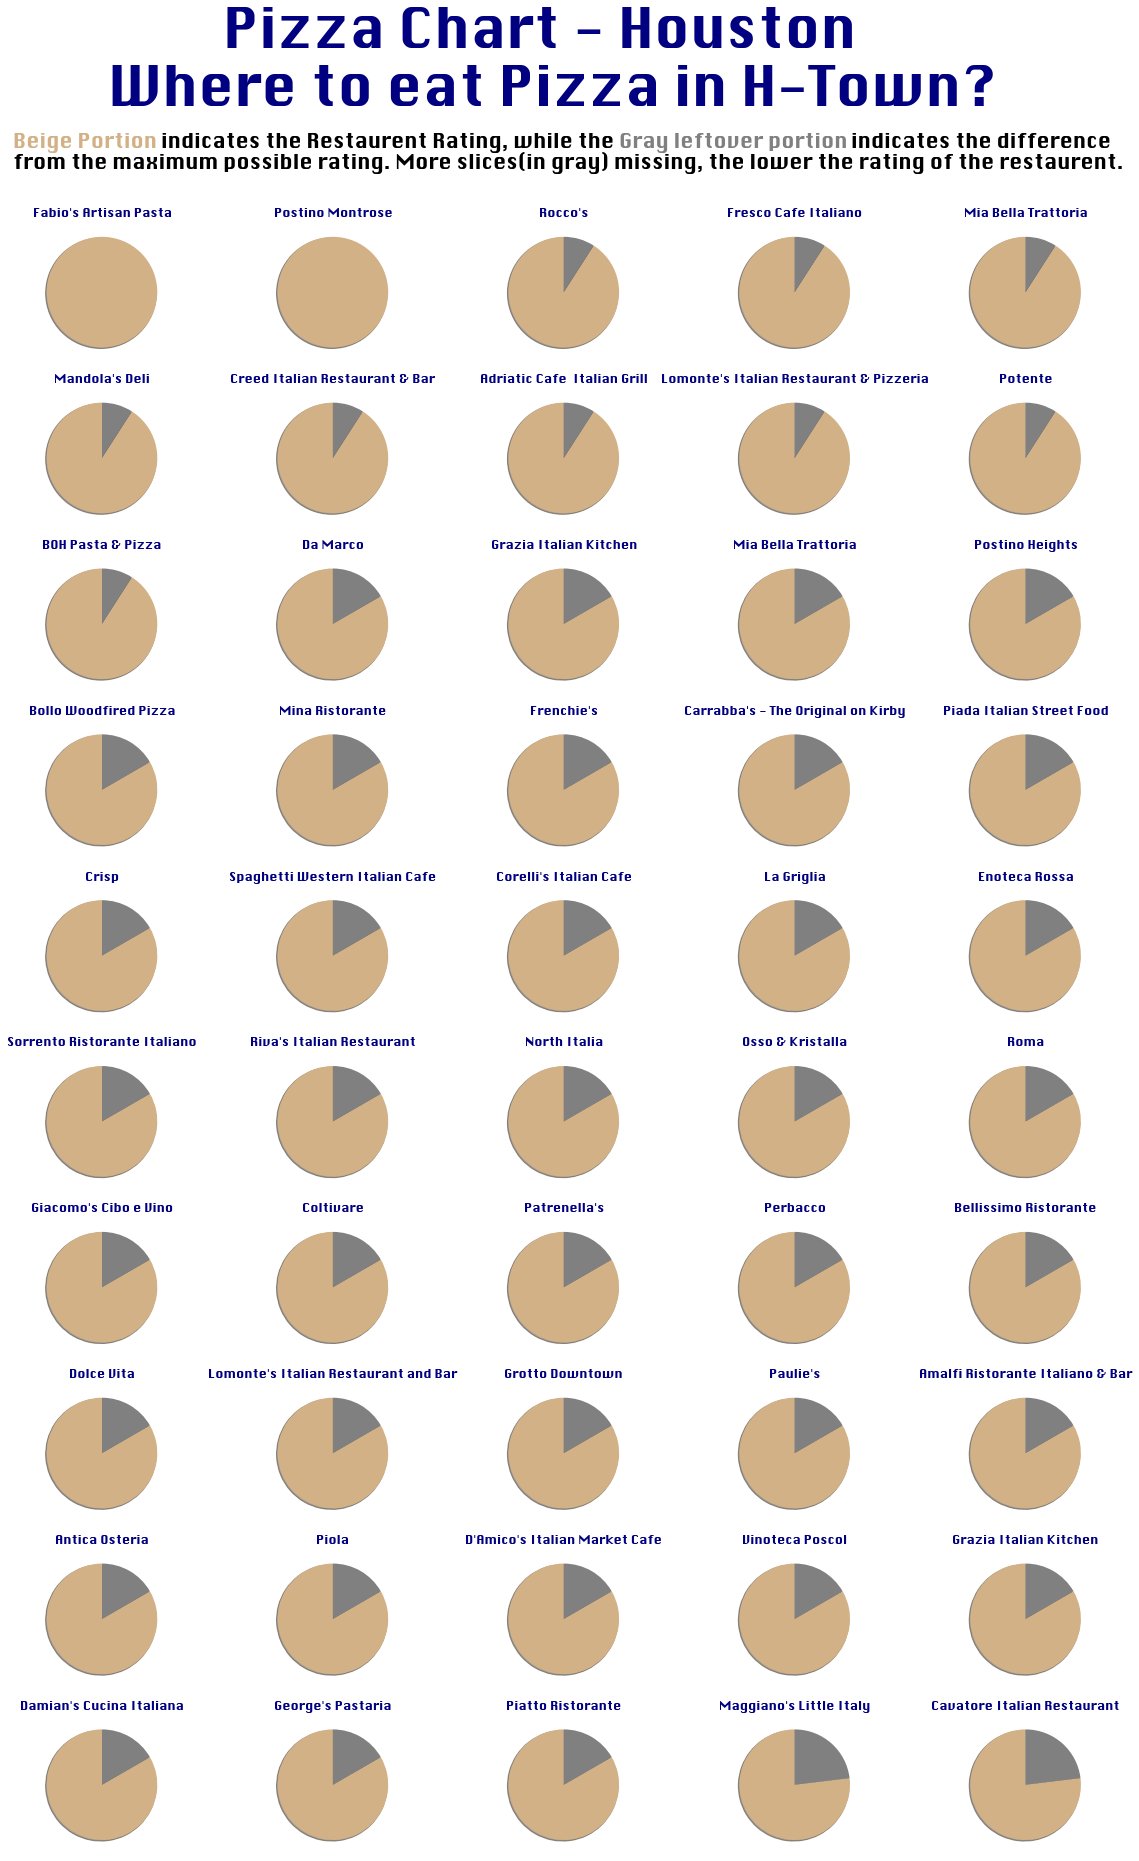

In [153]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.style as style
style.use('seaborn-darkgrid')

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Krungthep"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "Krungthep"

#rating = [4,3,2,5,2,3,4,2,3,5,4,1,2,3,4]
rating = df_data["rating"]
name = df_data["name"]
colors = ['#D3B186','gray']

row = 0
plt.figure(figsize=(350,350)) 
N = 15 # number of subplots you want
fig, ax1 = plt.subplots(10, 5)
fig.suptitle('Pizza Chart - Houston \n Where to eat Pizza in H-Town?',color="navy", fontsize=54, fontweight='bold')
row = 0
index=0
while row < 10:     # the header for the outer loop
    col = 0
    while col < 5:   # the header for the inner loop
        sizes = [5, 5-rating[index]]
        ax1[row,col].pie(sizes,labels=['',''],colors=colors, autopct='',shadow=True, startangle=90,textprops={'fontsize': 14})
        #plt.set_title(name[index])
        #ax1[row,col].title.set_text(name[index])
        ax1[row,col].set_title(name[index],fontsize= 12.5,color="navy")
        col+= 1
        index+=1
    

    row+=1
fig = plt.gcf()
fig.set_size_inches(20,30)

fig.text(0.13, 0.915, "Beige Portion",color='#D3B186', fontsize=20)
fig.text(0.2325, 0.915, "indicates the Restaurent Rating, while the",color='Black', fontsize=20)
fig.text(0.551, 0.915, "Gray leftover portion",color='gray', fontsize=20)
fig.text(0.712, 0.915, "indicates the difference",color='black', fontsize=20)
fig.text(0.13, 0.905, "from the maximum possible rating. More slices(in gray) missing, the lower the rating of the restaurent.",color='black', fontsize=20)
plt.savefig('htown_pizza.png', bbox_inches='tight')
plt.show()